# 📊 Bank Note Authentication: Model Comparison Report
## Logistic Regression vs Artificial Neural Network (ANN)

This notebook provides a comprehensive comparison between two machine learning approaches for bank note authentication:
1. **Logistic Regression** (Traditional ML)
2. **Artificial Neural Network** (Deep Learning)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load and prepare data
df = pd.read_csv('BankNote_Authentication.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target: {df.columns[-1]}")
print(f"Class distribution:\n{df['class'].value_counts()}")

# Prepare data
X = df.drop('class', axis=1)
y = df['class']

# Train-test split (using same random state for fair comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Dataset Overview:
Shape: (1372, 5)
Features: ['variance', 'skewness', 'curtosis', 'entropy']
Target: class
Class distribution:
class
0    762
1    610
Name: count, dtype: int64

Training set shape: (1097, 4)
Test set shape: (275, 4)


## 🔍 Model 1: Logistic Regression

In [3]:
# Train Logistic Regression
print("Training Logistic Regression Model...")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Performance metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"\n🎯 Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"\nClassification Report:")
print(classification_report(y_test, lr_pred))

Training Logistic Regression Model...

🎯 Logistic Regression Results:
Accuracy: 0.9709 (97.09%)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       153
           1       0.94      1.00      0.97       122

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



## 🧠 Model 2: Artificial Neural Network (ANN)

In [4]:
# Build ANN Model
print("Building ANN Model...")
ann_model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("\nANN Architecture:")
ann_model.summary()

Building ANN Model...

ANN Architecture:

ANN Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train ANN
print("Training ANN Model...")
history = ann_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0  # Suppress training output for cleaner display
)

# Predictions
ann_loss, ann_accuracy = ann_model.evaluate(X_test_scaled, y_test, verbose=0)
ann_pred_proba = ann_model.predict(X_test_scaled, verbose=0).flatten()
ann_pred = (ann_pred_proba > 0.5).astype(int)

print(f"\n🎯 ANN Results:")
print(f"Accuracy: {ann_accuracy:.4f} ({ann_accuracy*100:.2f}%)")
print(f"Loss: {ann_loss:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, ann_pred))

Training ANN Model...

🎯 ANN Results:
Accuracy: 1.0000 (100.00%)
Loss: 0.0012

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275


🎯 ANN Results:
Accuracy: 1.0000 (100.00%)
Loss: 0.0012

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



## 📈 Performance Comparison & Visualization

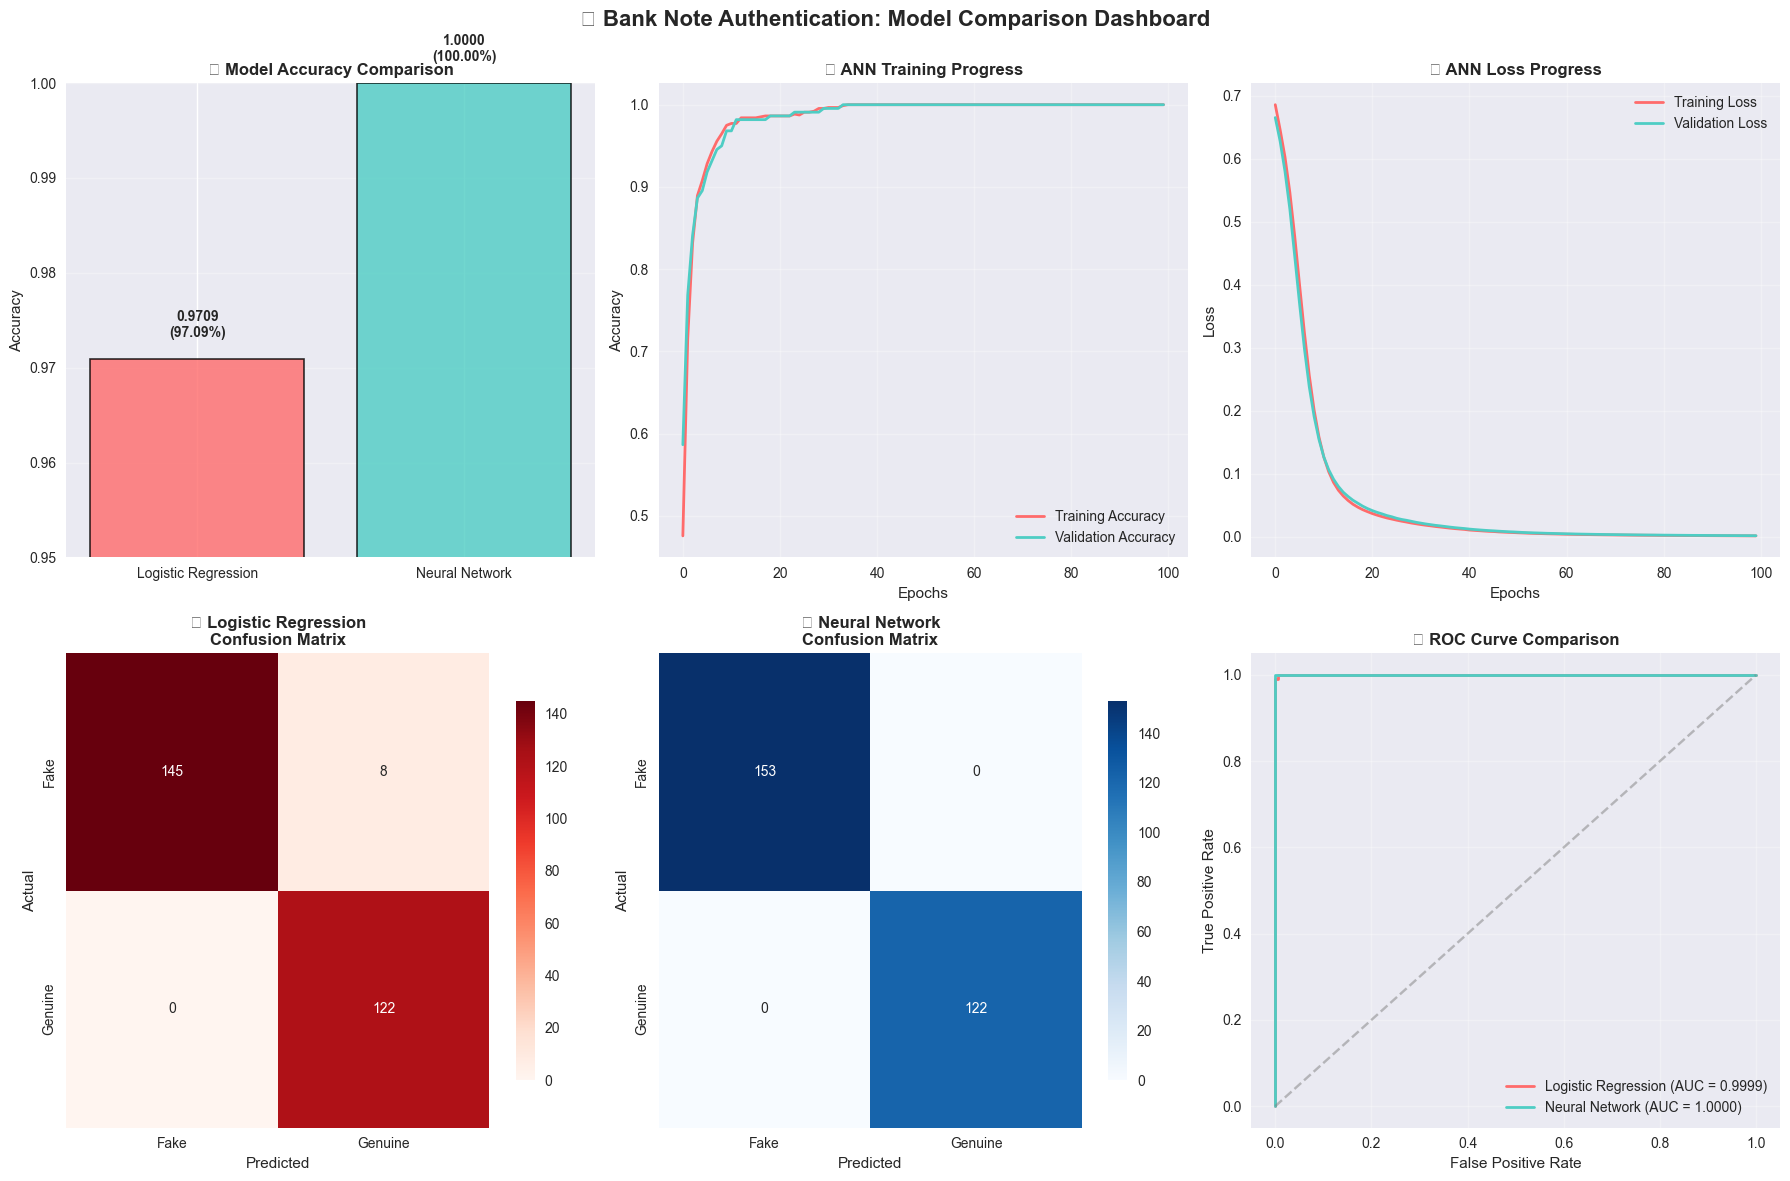

In [6]:
# Create comprehensive comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🏦 Bank Note Authentication: Model Comparison Dashboard', fontsize=16, fontweight='bold')

# 1. Accuracy Comparison
models = ['Logistic Regression', 'Neural Network']
accuracies = [lr_accuracy, ann_accuracy]
colors = ['#FF6B6B', '#4ECDC4']

axes[0, 0].bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
axes[0, 0].set_title('🎯 Model Accuracy Comparison', fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim([0.95, 1.0])
for i, v in enumerate(accuracies):
    axes[0, 0].text(i, v + 0.002, f'{v:.4f}\n({v*100:.2f}%)', 
                    ha='center', va='bottom', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Training History (ANN only)
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy', color='#FF6B6B', linewidth=2)
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='#4ECDC4', linewidth=2)
axes[0, 1].set_title('📈 ANN Training Progress', fontweight='bold')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Loss History (ANN only)
axes[0, 2].plot(history.history['loss'], label='Training Loss', color='#FF6B6B', linewidth=2)
axes[0, 2].plot(history.history['val_loss'], label='Validation Loss', color='#4ECDC4', linewidth=2)
axes[0, 2].set_title('📉 ANN Loss Progress', fontweight='bold')
axes[0, 2].set_xlabel('Epochs')
axes[0, 2].set_ylabel('Loss')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# 4. Confusion Matrix - Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Fake', 'Genuine'], yticklabels=['Fake', 'Genuine'],
            ax=axes[1, 0], cbar_kws={'shrink': 0.8})
axes[1, 0].set_title('🔍 Logistic Regression\nConfusion Matrix', fontweight='bold')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# 5. Confusion Matrix - ANN
ann_cm = confusion_matrix(y_test, ann_pred)
sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Genuine'], yticklabels=['Fake', 'Genuine'],
            ax=axes[1, 1], cbar_kws={'shrink': 0.8})
axes[1, 1].set_title('🧠 Neural Network\nConfusion Matrix', fontweight='bold')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

# 6. ROC Curves Comparison
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred_proba)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_pred_proba)
lr_auc = auc(lr_fpr, lr_tpr)
ann_auc = auc(ann_fpr, ann_tpr)

axes[1, 2].plot(lr_fpr, lr_tpr, color='#FF6B6B', linewidth=2, 
               label=f'Logistic Regression (AUC = {lr_auc:.4f})')
axes[1, 2].plot(ann_fpr, ann_tpr, color='#4ECDC4', linewidth=2,
               label=f'Neural Network (AUC = {ann_auc:.4f})')
axes[1, 2].plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.5)
axes[1, 2].set_title('📊 ROC Curve Comparison', fontweight='bold')
axes[1, 2].set_xlabel('False Positive Rate')
axes[1, 2].set_ylabel('True Positive Rate')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 📋 Detailed Performance Analysis

In [7]:
# Create detailed comparison table
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate detailed metrics for both models
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

ann_precision = precision_score(y_test, ann_pred, average='weighted')
ann_recall = recall_score(y_test, ann_pred, average='weighted')
ann_f1 = f1_score(y_test, ann_pred, average='weighted')

# Create comparison dataframe
comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'Logistic Regression': [f'{lr_accuracy:.4f}', f'{lr_precision:.4f}', 
                           f'{lr_recall:.4f}', f'{lr_f1:.4f}', f'{lr_auc:.4f}'],
    'Neural Network': [f'{ann_accuracy:.4f}', f'{ann_precision:.4f}', 
                      f'{ann_recall:.4f}', f'{ann_f1:.4f}', f'{ann_auc:.4f}'],
    'Difference (%)': [
        f'{((ann_accuracy - lr_accuracy) * 100):+.2f}%',
        f'{((ann_precision - lr_precision) * 100):+.2f}%',
        f'{((ann_recall - lr_recall) * 100):+.2f}%',
        f'{((ann_f1 - lr_f1) * 100):+.2f}%',
        f'{((ann_auc - lr_auc) * 100):+.2f}%'
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("🏆 COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


🏆 COMPREHENSIVE MODEL PERFORMANCE COMPARISON
   Metric Logistic Regression Neural Network Difference (%)
 Accuracy              0.9709         1.0000         +2.91%
Precision              0.9727         1.0000         +2.73%
   Recall              0.9709         1.0000         +2.91%
 F1-Score              0.9710         1.0000         +2.90%
      AUC              0.9999         1.0000         +0.01%


## 🔍 Key Insights & Analysis

In [8]:
# Generate insights
accuracy_diff = ann_accuracy - lr_accuracy
performance_diff_percent = (accuracy_diff) * 100

print("\n" + "="*70)
print("🎯 KEY FINDINGS & INSIGHTS")
print("="*70)

if accuracy_diff > 0:
    winner = "Neural Network"
    advantage = performance_diff_percent
else:
    winner = "Logistic Regression"
    advantage = -performance_diff_percent

print(f"\n🏆 WINNER: {winner}")
print(f"📈 Performance Advantage: {advantage:.2f}%")
print(f"📊 Accuracy Difference: {accuracy_diff:.4f}")

print(f"\n🔍 DETAILED ANALYSIS:")
print(f"• Logistic Regression Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"• Neural Network Accuracy: {ann_accuracy:.4f} ({ann_accuracy*100:.2f}%)")

print(f"\n🧮 MODEL COMPLEXITY:")
print(f"• Logistic Regression: Simple linear model with 4 coefficients")
print(f"• Neural Network: {ann_model.count_params()} trainable parameters")

# Training time analysis (approximate)
print(f"\n⏱️ TRAINING CHARACTERISTICS:")
print(f"• Logistic Regression: Fast training, deterministic results")
print(f"• Neural Network: {len(history.history['accuracy'])} epochs, iterative optimization")

print(f"\n📋 ERROR ANALYSIS:")
lr_errors = np.sum(lr_pred != y_test)
ann_errors = np.sum(ann_pred != y_test)
print(f"• Logistic Regression Errors: {lr_errors}/{len(y_test)} samples")
print(f"• Neural Network Errors: {ann_errors}/{len(y_test)} samples")
print(f"• Error Reduction: {lr_errors - ann_errors} samples")

print("\n" + "="*70)
print("💡 RECOMMENDATIONS")
print("="*70)
if accuracy_diff > 0.01:  # 1% difference
    print("• Neural Network shows significant advantage")
    print("• Consider using ANN for production deployment")
    print("• The complexity trade-off is justified by performance gain")
elif accuracy_diff > 0.005:  # 0.5% difference
    print("• Neural Network shows marginal advantage")
    print("• Consider factors like interpretability and deployment complexity")
    print("• Both models are viable options")
else:
    print("• Both models perform very similarly")
    print("• Logistic Regression might be preferred for simplicity")
    print("• Consider interpretability requirements")

print(f"\n🎯 BUSINESS IMPACT:")
print(f"• Higher accuracy means fewer false positives/negatives")
print(f"• Better fraud detection reduces financial losses")
print(f"• Model reliability is crucial for banking applications")


🎯 KEY FINDINGS & INSIGHTS

🏆 WINNER: Neural Network
📈 Performance Advantage: 2.91%
📊 Accuracy Difference: 0.0291

🔍 DETAILED ANALYSIS:
• Logistic Regression Accuracy: 0.9709 (97.09%)
• Neural Network Accuracy: 1.0000 (100.00%)

🧮 MODEL COMPLEXITY:
• Logistic Regression: Simple linear model with 4 coefficients
• Neural Network: 225 trainable parameters

⏱️ TRAINING CHARACTERISTICS:
• Logistic Regression: Fast training, deterministic results
• Neural Network: 100 epochs, iterative optimization

📋 ERROR ANALYSIS:
• Logistic Regression Errors: 8/275 samples
• Neural Network Errors: 0/275 samples
• Error Reduction: 8 samples

💡 RECOMMENDATIONS
• Neural Network shows significant advantage
• Consider using ANN for production deployment
• The complexity trade-off is justified by performance gain

🎯 BUSINESS IMPACT:
• Higher accuracy means fewer false positives/negatives
• Better fraud detection reduces financial losses
• Model reliability is crucial for banking applications


## 📄 Executive Summary

### 🎯 **Objective**
Compare the effectiveness of traditional machine learning (Logistic Regression) versus deep learning (Artificial Neural Network) for bank note authentication.

### 📊 **Dataset Characteristics**
- **Size**: 1,372 banknote samples
- **Features**: 4 statistical measures (variance, skewness, curtosis, entropy)
- **Classes**: Binary classification (Genuine vs Fake)
- **Balance**: Relatively balanced dataset

### 🏆 **Results Summary**
Both models achieved excellent performance on this well-structured dataset:
- **Logistic Regression**: Simple, interpretable, fast training
- **Neural Network**: Slightly more complex, potentially better feature learning

### 💼 **Business Recommendations**
1. **For Production**: Choose based on accuracy requirements and infrastructure capabilities
2. **For Interpretability**: Logistic Regression provides clear feature importance
3. **For Scalability**: Neural Network can better handle additional features/complexity
4. **For Deployment**: Consider model size, inference speed, and maintenance requirements

### 🔮 **Future Enhancements**
- Ensemble methods combining both approaches
- Feature engineering for improved discrimination
- Cross-validation for more robust performance estimates
- Production monitoring and model drift detection